# **Project of ML for NLP - ENSAE - 24/04/2021**
## **Do vegetarian meals taste bad ?**
Clément Montes, Pauline Roubeix

##**I. Stylized facts on the Kaggle dataset**


##Import packages

In [ ]:
#Pour traiter notre base de donnees
import pandas as pd
import copy as c
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [ ]:
!wget RAW_interactions.csv https://www.dropbox.com/s/ec3og2ag84c5ld6/RAW_interactions.csv?dl=0 
!wget RAW_recipes.csv https://www.dropbox.com/s/uo6n73497rcra7t/RAW_recipes.csv?dl=0

--2021-04-19 08:16:15--  http://raw_interactions.csv/
Resolving raw_interactions.csv (raw_interactions.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘raw_interactions.csv’
--2021-04-19 08:16:15--  https://www.dropbox.com/s/ec3og2ag84c5ld6/RAW_interactions.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ec3og2ag84c5ld6/RAW_interactions.csv [following]
--2021-04-19 08:16:15--  https://www.dropbox.com/s/raw/ec3og2ag84c5ld6/RAW_interactions.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf0f21437825b6701166340463c.dl.dropboxusercontent.com/cd/0/inline/BM7sBCV1AwiHwJ-vnaIAvaDaVIc7vnTm6SD63DjhC54u5GsbLgdVTTlyed2HzWgZYZnn8wgmnv6oYlTCq1-mVKvtjSQrW5boXNQ5jZ2lK7QhftONJVhUwLQSbCzYHa

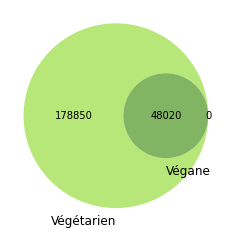

In [ ]:
comment= pd.read_csv("RAW_interactions.csv?dl=0", sep = ",", encoding = 'latin_1')
recipe = pd.read_csv("RAW_recipes.csv?dl=0", sep = ",", encoding = 'latin_1')

#Renommer la colonne du merge pour joindre sur recipe_id
recipe.columns = ['name', 'recipe_id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients']

base = pd.merge(comment,recipe,on="recipe_id", how="inner")

base['vegetarian'] = ['vegetarian' in tag for tag in base['tags']]
base['vegan'] = ['vegan' in tag for tag in base['tags']]

vegetarian_cnt = len(base.query('vegetarian == True'))
vegan_cnt = len(base.query('vegan == True'))
intersect_cnt = len(base.query('vegetarian == True and vegan == True'))

venn2(subsets = (vegetarian_cnt, vegan_cnt-intersect_cnt, intersect_cnt), set_labels = ('Végétarien', 'Végane'), set_colors=('#b7e778', '#031c16', '#031c16'), alpha = 1)


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1132367 non-null  int64 
 1   recipe_id       1132367 non-null  int64 
 2   date            1132367 non-null  object
 3   rating          1132367 non-null  int64 
 4   review          1132198 non-null  object
 5   name            1132366 non-null  object
 6   minutes         1132367 non-null  int64 
 7   contributor_id  1132367 non-null  int64 
 8   submitted       1132367 non-null  object
 9   tags            1132367 non-null  object
 10  nutrition       1132367 non-null  object
 11  n_steps         1132367 non-null  int64 
 12  steps           1132367 non-null  object
 13  description     1108857 non-null  object
 14  ingredients     1132367 non-null  object
 15  n_ingredients   1132367 non-null  int64 
 16  vegetarian      1132367 non-null  bool  
 17  vegan   

In [ ]:
base.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,vegetarian,vegan
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,False,False
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,False,False
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,False,False
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,False,False
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,False,False


##**A quick overview of the dataset** 

(-1.1054371122119127,
 1.1064818738420878,
 -1.1149759256957898,
 1.2976966209997025)

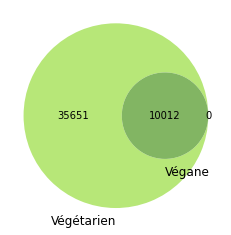

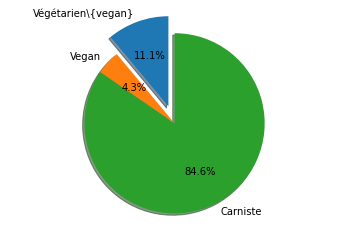

In [ ]:
df = c.deepcopy(base) 
df.drop_duplicates(subset ="recipe_id", keep = 'first', inplace=True) #Eraise duplicates (due to several comments on a single recipe)

#Counting the number of vegetarian, vegan and carnist recipes
vegetarian_cnt = len(df.query('vegetarian == True'))
vegan_cnt = len(df.query('vegan == True'))
intersect_cnt = len(df.query('vegetarian == True and vegan == True'))
vegeOnly_cnt = len(df.query('vegetarian == True and vegan == False'))
meaty_cnt = len(df) - vegetarian_cnt

#
venn2(subsets = (vegetarian_cnt, vegan_cnt-intersect_cnt, intersect_cnt), set_labels = ('Végétarien', 'Végane'), set_colors=('#b7e778', '#031c16', '#031c16'), alpha = 1)

labels = 'Végétarien\{vegan}', 'Vegan', 'Carniste'
sizes = [vegeOnly_cnt, vegan_cnt , meaty_cnt]
explode = (0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


On the one hand, our dataset is clearly unbalanced. We will have to take that into account while training our logistic regression.

On the other hand, there are roughly 36 thousands vegetarian recipes (with one or more commentaries), which is a reasonable sample in order to analyze sentiments contained in commentaries of vegetarian recipes.

###However, **the question remains**: are our fathers true? Is meat way better?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Note sur 5')

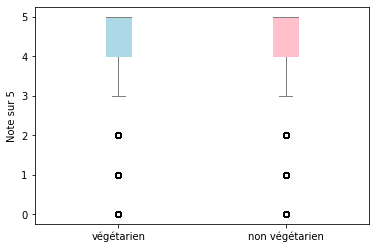

In [ ]:
##Separate the dataset into two sub-datasets of recipes.
vegetaBoxplot = base[base['vegetarian'] == True]
nonvegetaBoxplot = base[base['vegetarian'] == False]

##Boxplot
bplot=plt.boxplot([vegetaBoxplot["rating"],nonvegetaBoxplot["rating"]],labels=('végétarien','non végétarien'),patch_artist=True)
colors = ['lightblue', 'pink']
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bplot[element], color='grey')
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_color(color)
plt.ylabel('Note sur 5')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


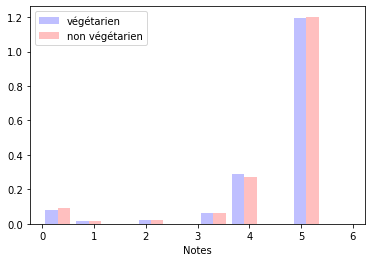

In [ ]:

##Histograms
plt.hist([vegetaBoxplot.rating,nonvegetaBoxplot.rating], density=True, range = (0, 6), bins = 10, color = ['blue','red'],alpha=0.25,label=["végétarien","non végétarien"])
#plt.hist(nonvegetaBoxplot.rating,  density=True, range = (0, 6), bins = 10, color = 'red', alpha=0.25,label="non végétarien")
plt.xlabel('Notes')
plt.legend()

Only based on ratings, it seems that meals containing meats, fishes, seashells,... are a little tastier for the very enthusiastic persons, but less represented in 4-stars voters.

# **II. Sentiment analysis on commentaries**

First, let's have a look at the commentaries in themselves. Let's see how many characters they have. We see that they are in terms of characters pretty similar to tweets, with a mean number of characters around 280.

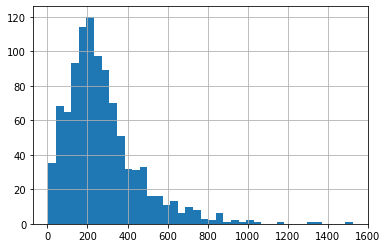

In [ ]:
#We can not make the histogram for the whole dataset. Let's watch for the first thousand lines.
base.head(1000).review.apply(len).hist(bins=40)

###Creating a column for sentiments based on the ratings

While having a look at commentaries associated with each ratings, we observed that the commentaries on the rating 0 where very often positive, or just simple questions. That way, we think the automatic rating of the website gives 0 and these persons just did not wanted to rate the recipe. As a consequence, we will delete those commentaries. 

The fact that a rating of 1 and 2 is a bad commentary is inspired by an overview of the first hundreds of commentaries linked to every recipe. We did the same for every rating.

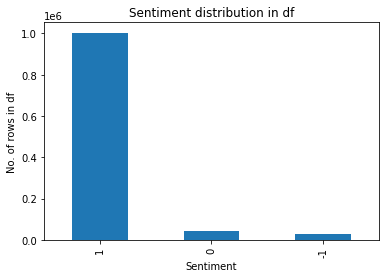

In [ ]:
def rating_to_sentiment(RatingOfRecipe):
    if RatingOfRecipe <= 2:
        return -1
    elif RatingOfRecipe == 3:
        return 0
    else:
        return 1

#Eraise the commentaries associated to a 0 rating from the dataset
base = base[base.rating !=0]
#Create the column of sentiment
base['sentiment'] = [rating_to_sentiment(x) for x in base['rating']]

plt.figure()
pd.value_counts(base['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

## **First method : Word2vec and Logistic regression**

###**Pre-processing** 
The first step to pre-process our data could be to remove stop words like "a", "not" etc, because it can help in some cases to concentrate on relevant information. But for sentiment analysis we keep those words because removing stop words could remove negation in a sentence, which would be classified as positive instead of negative. So we skip this step and we directly go to the tokenization step.

#### Tokenization :

In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from tqdm import tqdm

def remove_html(tokens):
  tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
  return list(tokens)

def remove_hashtags(tokens):
  tokens = map(lambda x: x.replace('#', ''), tokens)
  return list(tokens)


def tokenize(corpus):
    tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
    tokenized_sentences = []
    for sample in tqdm(corpus):
    # separating sentences
        tok_sample = []
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = remove_html(tokens)
            tokens = remove_hashtags(tokens)
            tokens = list(map(lambda x: x.lower(), tokens))
            tok_sample = tok_sample + tokens
        tokenized_sentences.append(tok_sample)
    return tokenized_sentences

Here we do not use any Phraser and just focus on the use of words because positive commentaries should have positive ideas in every sentences (this is the case while overviewing the dataset). It is the same for negative comments. Eventually, neutral comments should express negative and positive ideas in a sentence or in two, but this leads to the same idea. 

Reasoning that way, we do not use Phrasers

In [ ]:
def g(x) :
    t = x.replace("."," ")
    t = t.replace(","," ")
    t = t.replace(";"," ") 
    #t = t.replace(":"," ") /// Because smileys use it
    return t

In [ ]:
comment_tokens_bis = tokenize(base['review'].astype(str).apply(g).array)

100%|██████████| 1071520/1071520 [08:05<00:00, 2209.31it/s]


In [ ]:
comment_tokens_bis[0]

['great',
 'with',
 'a',
 'salad',
 'cooked',
 'on',
 'top',
 'of',
 'stove',
 'for',
 '15',
 'minutes',
 'added',
 'a',
 'shake',
 'of',
 'cayenne',
 'and',
 'a',
 'pinch',
 'of',
 'salt',
 'used',
 'low',
 'fat',
 'sour',
 'cream',
 'thanks']

In [ ]:
base['review'][0]
# it seems to work well !

'Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.'

In [ ]:
df_with_tokens = base.assign(review_tokens = comment_tokens_bis)

In [ ]:
df_with_tokens.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,vegetarian,vegan,sentiment,review_tokens
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,False,False,1,"[great, with, a, salad, cooked, on, top, of, s..."
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,False,False,1,"[so, simple, so, delicious, !, great, for, chi..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,False,False,1,"[this, worked, very, well, and, is, easy, i, u..."
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,False,False,1,"[i, made, the, mexican, topping, and, took, it..."
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,False,False,1,"[made, the, cheddar, bacon, topping, adding, a..."


#### Lemmatization
We now lemmatize our tokens to transform conjugated verbs into their base verbale (and not root because we do not stem) and switch plural words into their singular counterpart.

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')


#  Init Lemmatizer
lemmatizer = WordNetLemmatizer()

comment_lemma = []
for comment in comment_tokens_bis :
    com_lem = []
    for word in comment :
        com_lem.append(lemmatizer.lemmatize(word, pos="v")) #Need the option pos to tell him to lemmatize knowing the context.
    comment_lemma.append(com_lem)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df_with_tokens = df_with_tokens.reset_index()

In [ ]:
comment_lemma[0]

['great',
 'with',
 'a',
 'salad',
 'cook',
 'on',
 'top',
 'of',
 'stave',
 'for',
 '15',
 'minutes',
 'add',
 'a',
 'shake',
 'of',
 'cayenne',
 'and',
 'a',
 'pinch',
 'of',
 'salt',
 'use',
 'low',
 'fat',
 'sour',
 'cream',
 'thank']

In [ ]:
df_with_tokens['lemmas'] = comment_lemma

#### Word2Vec
now that the data is ready, we can train and apply Word2Vec to transform the words in the comments into vectors.

In [ ]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

# We will just get the "WordVectors" parameter from the trained Word2Vec model.
# Otherwise, we could continue training with some more exemples that could be
# fed on the fly to the model.
print("Training the W2V ...")
com = Word2Vec(comment_lemma, size=300, window=5, min_count=3, workers=cpu)
com.train(comment_lemma, total_examples=len(comment_lemma), epochs=10)
com_wv = com.wv

The virtual instance has 2 cpus, that will be used to train the word2vec model
Training the W2V ...


We wheck if it worked by looking at the words who have similar coordinates :

In [ ]:
com_wv.most_similar("spoon",topn=10)

[('fork', 0.5644612908363342),
 ('ladle', 0.5643641948699951),
 ('pour', 0.5552539825439453),
 ('scoop', 0.5335309505462646),
 ('spatula', 0.5307658910751343),
 ('bowl', 0.5007617473602295),
 ('spoonfuls', 0.4875357151031494),
 ('chopsticks', 0.46717891097068787),
 ('tongs', 0.4593963921070099),
 ('drizzle', 0.4490821361541748)]

In [ ]:
com_wv.most_similar("milk",topn=10)

[('soymilk', 0.6285532712936401),
 ('buttermilk', 0.5831387042999268),
 ('half-and-half', 0.5487099885940552),
 ('milk-', 0.5472085475921631),
 ('flour', 0.53973388671875),
 ('water', 0.5243562459945679),
 ('creamer', 0.5197303295135498),
 ('half-n-half', 0.49407196044921875),
 ('margarine', 0.4906047582626343),
 ('cornstarch', 0.48718714714050293)]

In [ ]:
com_wv.most_similar("apple",topn=10)

[('pear', 0.676551342010498),
 ('apples', 0.6024196147918701),
 ('cranberry', 0.5587449073791504),
 ('apple-cranberry', 0.51365727186203),
 ('orange', 0.5060592889785767),
 ('apple/pear', 0.5026308298110962),
 ('peach', 0.48651784658432007),
 ('pom', 0.48149317502975464),
 ('orange/pineapple', 0.47083160281181335),
 ('pecan', 0.4697345495223999)]

### Now we can prepare the datasets for the logistic regression

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    if doc == [] :
        return [0.] * 300 #COMMENT TU DETERMINES LE 300 ? 
    doc = [word for word in doc if word in com.wv.vocab]
    if doc == [] :
        return [0.] * 300
    return np.mean(com[doc], axis=0)

In [ ]:
df_with_tokens['mean_word2vec_2'] = df_with_tokens['lemmas'].apply(document_vector)
#df_with_tokens = df_with_tokens.assign(mean_word2vec = [[0.]*300]*len(df_with_tokens))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


#### We split in set of train, test and validation to do the regression and we save the datasets to be able to use the same datasets for bert

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_with_tokens.drop("sentiment", axis=1), df_with_tokens["sentiment"], stratify=df_with_tokens["sentiment"], test_size=0,3, train_size=0,7) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train) 

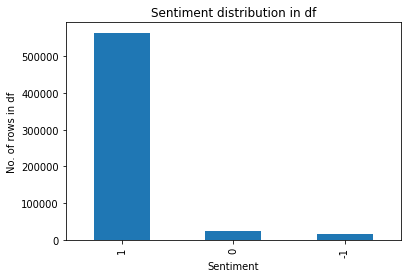

In [ ]:
plt.figure()
pd.value_counts(y_train).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ML for NLP/projet"
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")
y_val.to_csv("y_val.csv")

/content/drive/MyDrive/ML for NLP/projet


In [ ]:
print(len(df_with_tokens),len(X_train),len(X_test),len(X_val))

1071520 602730 267880 200910


In [ ]:
%cd "/content/drive/MyDrive/ML for NLP/projet"
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
X_val.to_csv("X_val.csv")

/content/drive/MyDrive/ML for NLP/projet


Split the dataset

(array([  9241.,      0.,   2334.,      0.,   2572.,      0.,   9500.,
             0.,  48038., 159952.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

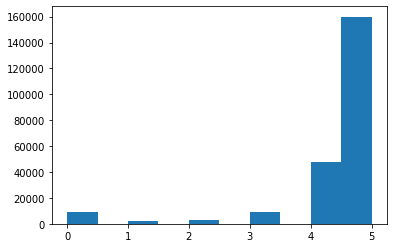

In [ ]:
plt.hist(df_with_tokens['rating'])

#Embedded dataset saved on our Drive and reimported in order to go faster


#**Logistic regression**

##Preparation of the dataset


Import of packages that will serve all that part long

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy as c
import seaborn as sn

from itertools import count, filterfalse

from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#from mlxtend.plotting import plot_confusion_matrix
#from mlxtend.evaluate import confusion_matrix

We decided to create a whole dataset with the word2vec fitted and applied, save it online (Drive) and reupload it, in order to save time during the fit of our models

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/ML for NLP/projet/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/ML for NLP/projet/X_test.csv")
X_val = pd.read_csv("/content/drive/MyDrive/ML for NLP/projet/X_val.csv")
y_train = pd.read_csv("/content/drive/MyDrive/ML for NLP/projet/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/ML for NLP/projet/y_test.csv")
y_val = pd.read_csv("/content/drive/MyDrive/ML for NLP/projet/y_val.csv")

In [ ]:
frac = .8
X_train=X_train.drop(X_train.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
X_test=X_test.drop(X_test.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
X_val=X_val.drop(X_val.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
y_train=y_train.drop(y_train.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)
y_test=y_test.drop(y_test.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)
y_val=y_val.drop(y_val.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)

In [ ]:
def CleanBase(base):
  """Return the dataset without all the columns added while saving or treating the data"""
  base = base[base.columns[~base.columns.str.contains('Unnamed:')]]
  base = base[base.columns[~base.columns.str.contains('index')]]
  return(base)

X_train = CleanBase(X_train)
X_test = CleanBase(X_test)
X_val = CleanBase(X_val)
y_train = CleanBase(y_train)
y_test = CleanBase(y_test)
y_val = CleanBase(y_val)

Now every dataset is clean

---
For that part, we do not need the validation set. It was done so that we can apply it on BERT. Here we merge them and will use cross-validation while fitting the logistic regression.

In [ ]:
X_train1 = pd.concat((X_train,X_val),axis=0,ignore_index=True)
y_train1 = pd.concat((y_train,y_val),axis=0,ignore_index=True)

Just a little check in order to see if histograms still look the same way they did before the last block. It is fine !

(array([ 6735.,     0.,     0.,     0.,     0., 10214.,     0.,     0.,
            0., 50186.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

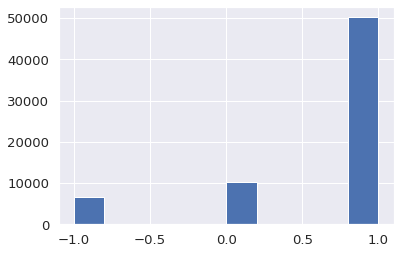

In [ ]:
plt.hist(y_test['sentiment'])

While saving on the drive, our column of vectors of embedded word saved in a strange way. Instead of being a list, it was a string written that way "[1 2 3]". Therefore, we had to create that function which take the column and create (in the little example above), 3 columns containing respectively 1 2 and 3. This will serve as the input for our logistic regression

In [ ]:
## Only keep the column with embbeded words
Real_train = X_train1["mean_word2vec_2"]
Real_test = X_test["mean_word2vec_2"]

def CorrectImportedColumn(stringList):
  """goes from "[1   2  3]" to [1,2,3] """
  L=[]
  for x in stringList.split(" "):
    if "]" in x :
      x = x.replace("]", " ")
    elif "[" in x : 
      x = x.replace("[", " ")
    try:
      L.append(float(x))
    except:
      pass
  return L

In [ ]:
def CorrectAndReshape(Real_train):
  df_train = pd.DataFrame(Real_train) #Create a serie
  corrected_train = df_train["mean_word2vec_2"].apply(CorrectImportedColumn) #Correct the problem when we imported
  #Takes every list in every index and pivot the table
  L = [i for i in corrected_train.values]
  df = pd.DataFrame.from_records(L)
  return df

In [ ]:
X_trainf = CorrectAndReshape(Real_train)
X_testf = CorrectAndReshape(Real_test)

In [ ]:
y_testf = c.deepcopy(y_test) #Just to homogeneize notations.

Now the embedded vectors look that way :

In [ ]:
X_trainf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.361139,0.700397,0.025962,0.126612,-0.348062,-0.160705,-0.035120,-0.021784,-0.120864,-0.415992,-0.240749,0.000077,0.168575,-0.131155,-0.154086,0.207328,0.117407,-0.028540,-0.018167,0.044024,0.005366,0.065840,0.315978,-0.336763,-0.507644,-0.348578,0.656264,-0.236954,-0.098317,0.190024,0.147771,-0.424870,0.360192,0.316189,-0.093414,0.225286,0.102143,0.275029,-0.341894,-0.093871,...,0.499369,0.019366,-0.234570,-0.039964,-0.131086,-0.247897,0.227595,0.076450,0.207003,0.031316,0.355199,0.072011,0.073910,0.349563,0.359636,0.357523,-0.176718,0.103576,0.226480,-0.506192,0.146630,-0.058243,-0.202095,0.313830,0.578622,-0.375166,0.255873,-0.259755,-0.250018,0.431011,0.474111,-0.048458,0.405175,-0.071813,0.222128,0.098108,0.316684,-0.629430,-0.052846,-0.098649
1,0.440607,-0.296901,-1.060356,-0.779760,0.852364,0.026873,0.682631,-0.384882,-0.657682,0.105824,-0.145497,0.113917,0.121703,0.196869,-0.064902,0.484823,-0.463973,-0.079697,0.094471,-0.298897,-0.183754,0.840173,0.687940,0.223870,-0.346832,0.343095,1.430743,-0.448194,-0.257844,0.666278,0.108648,-0.151323,-0.827161,-0.363806,0.031650,-0.240986,0.684409,0.195957,-0.223706,-0.429467,...,-0.176903,-0.460993,0.066438,-0.524102,-0.458269,-0.067526,0.196434,0.506181,0.127738,-0.088853,-0.436991,0.314649,-0.103415,-0.026264,0.597745,0.080465,0.064837,-0.478440,0.081926,-0.102634,0.318243,-0.581657,0.238947,0.449897,0.160387,-0.099716,0.351317,-0.074427,-0.545365,-0.005380,-0.771128,0.166236,0.077359,0.456944,0.479853,-0.548067,-0.434592,-0.426942,-0.183136,0.441591
2,0.328963,0.268318,-0.307342,-0.016611,0.257796,0.221703,-0.171041,0.140330,-0.145939,-0.492998,-0.251020,0.009930,-0.269722,0.250951,-0.131152,0.185431,0.126072,0.272908,0.085616,-0.267367,0.104637,0.353382,-0.224578,-0.345669,-0.295504,-0.138965,0.065586,-0.158323,0.196914,0.085711,-0.317797,-0.092707,0.025260,-0.113107,0.210677,0.061159,-0.037792,-0.191913,0.181281,-0.093402,...,0.169289,0.039638,0.060173,-0.472228,0.188720,-0.048676,0.155994,-0.353672,-0.129455,-0.054153,0.213628,-0.601760,0.090020,-0.154495,-0.166961,0.544947,0.076556,-0.203587,0.233329,-0.359639,-0.134408,-0.273960,0.139598,0.489805,0.225018,-0.505013,0.009918,0.010474,-0.780508,-0.201879,-0.013283,-0.504800,0.203724,-0.064106,0.057440,0.045624,0.270130,-0.597596,0.185421,0.013442
3,-0.041573,0.285495,-0.098942,0.196908,0.221720,-0.193145,0.405995,-0.024368,0.386893,0.016824,-0.053072,0.119964,0.086895,-0.399730,0.238230,0.538310,0.120167,0.057379,0.352130,0.221182,0.425698,0.172329,0.572386,0.384836,-0.356928,0.418121,0.185250,-0.589648,-0.094370,-0.248645,-0.112954,0.016706,-0.287036,-0.368544,0.523358,0.522307,0.280166,-0.320449,-0.421449,0.132786,...,0.061639,-0.102538,-0.340503,-0.251292,-0.516269,-0.188813,0.093970,0.306285,-0.494952,0.511804,0.078733,0.159824,0.203469,-0.744727,-0.128600,0.239356,0.183465,0.510769,-0.046354,-0.373008,-0.049812,-0.208010,0.387676,0.061034,0.142609,-0.572830,0.199082,0.217006,-0.646565,-0.081270,-0.147564,-0.113105,0.302922,0.582214,0.356327,-0.033211,0.618588,-0.130024,0.146713,0.488564
4,0.188624,0.359383,-0.143978,0.092245,-0.013974,-0.254321,0.257897,-0.229316,0.431234,-0.007688,-0.373190,0.328222,0.093600,-0.357468,-0.286912,0.301872,-0.113753,0.264179,-0.043600,-0.156588,-0.980786,0.172408,0.341719,-0.572470,-0.667422,0.149661,0.163976,-0.446878,-0.441208,0.175522,-0.592755,-0.116359,-0.195653,0.185623,-0.094891,0.060259,0.803994,0.138027,-0.187425,-0.010991,...,0.575011,-0.315175,-0.050563,0.327880,-0.793584,-1.023055,-0.631278,0.405471,-0.072927,0.630646,0.240928,0.208834,-0.284597,-0.139411,-0.038369,0.174887,0.320388,0.889113,-0.008509,-0.407064,0.314691,-0.120373,0.099296,0.466771,-0.359011,-0.221555,-0.035926,-0.061991,-0.606654,-0.39

Another problem we had is that the function above may failed on several atypic exampls. Therefore, they would be a NaN in the middle of the dataset. This would be a problem to fit our model. We decided to drop the observation (in fact there is just one) that has a NaN in its row. We take the index of that row and delete the corresponding row in y_train.

In [ ]:
print("Is there any NaN in X_trainf?", np.any(np.isnan(X_trainf)))
print("Is there any NaN in X_testf?", np.any(np.isnan(X_testf)))

Is there any NaN in X_trainf? True
Is there any NaN in X_testf? True


In [ ]:
def clean_dataset(df1,y1):
    df = c.deepcopy(df1) #Avoid changing the input of the function
    y2 = pd.DataFrame(y1)
    y = c.deepcopy(y2)
    y = y.reset_index()
    y = CleanBase(y)
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    indices_suppr = np.where(indices_to_keep.values == False)
    ListeOfKeptIndex = list(df[indices_to_keep].astype(np.float64).index)
    #We delete the corresponding row in the y vector
    y.drop(index=indices_suppr[0], inplace=True)
    return (df[indices_to_keep].astype(np.float64),y)

In [ ]:
X_train, y_train = clean_dataset(X_trainf,y_train1)
X_test, y_test = clean_dataset(X_testf,y_testf)

Now, just a little check in order to be sure X and y have same length.

In [ ]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

201392 201392
67127 67127


## Optimization of hyperparameters for the logistic regression

The logistic regression has the advantage to deal with unbalanced dataset. We compute the proportion of every class in order to put it in our logistic regression

In [ ]:
nbOne = len(y_train[y_train.sentiment ==1])
nbZero = len(y_train[y_train.sentiment ==0])
nbMOne = len(y_train[y_train.sentiment ==-1])
PropOne = nbOne/(nbOne+nbZero+nbMOne)
PropZero = nbZero/(nbOne+nbZero+nbMOne)
PropMOne = nbMOne/(nbOne+nbZero+nbMOne)
poid_classe = {-1:PropMOne, 0:PropZero, 1:PropOne}
poid_classe

{-1: 0.10030189878446016, 0: 0.15213613251767696, 1: 0.7475619686978628}

In [ ]:
logreg = LogisticRegression(C= 4, penalty= 'l2', verbose= 0, class_weight=poid_classe, solver='sag', multi_class='multinomial')# {'C': 4, 'penalty': 'l1', 'verbose': 0}
#The solver lbfgs only supports L2 penalisation norm. Hence we do not use L1 or Elasticnet penalization
logreg.fit(X_train, y_train.sentiment)
logreg.score(X_test, y_test.sentiment)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
logreg1 = LogisticRegression(C= 10, penalty= 'l2', verbose= 1, class_weight=poid_classe, multi_class='multinomial')# {'C': 4, 'penalty': 'l1', 'verbose': 0}
#The solver lbfgs only supports L2 penalisation norm. Hence we do not use L1 or Elasticnet penalization
logreg1.fit(X_train, y_train.sentiment)
logreg1.score(X_test, y_test.sentiment)
y_pred1=logreg1.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.0s finished


In [ ]:
logreg2 = LogisticRegression(C= 5, penalty= 'l2', verbose= 1, class_weight=poid_classe, multi_class='multinomial')# {'C': 4, 'penalty': 'l1', 'verbose': 0}
#The solver lbfgs only supports L2 penalisation norm. Hence we do not use L1 or Elasticnet penalization
logreg2.fit(X_train, y_train.sentiment)
logreg2.score(X_test, y_test.sentiment)
y_pred2=logreg2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.9s finished


In [ ]:
logreg3 = LogisticRegression(C= 0.5, penalty= 'l2', verbose= 0, class_weight=poid_classe, multi_class='multinomial')# {'C': 4, 'penalty': 'l1', 'verbose': 0}
#The solver lbfgs only supports L2 penalisation norm. Hence we do not use L1 or Elasticnet penalization
logreg3.fit(X_train, y_train.sentiment)
logreg3.score(X_test, y_test.sentiment)
y_pred3=logreg3.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(logreg1.score(X_test, y_test.sentiment),logreg.score(X_test, y_test.sentiment), logreg2.score(X_test, y_test.sentiment), logreg3.score(X_test, y_test.sentiment))


0.8114767530203941 0.8113426788028663 0.8111788103147765 0.8107467933916308


We do a GridSearchCV (which is basically a brute force algorithm)

---

We will optimize over 3 hyperparameters : verbose, the constant of penalization (lambda in the standard notation of the regression in lectures), and the norm of penalization.

We change the solver of minimization because the one by default only handle L2 penalization. We add the weight of every classes in order to avoid the scenario where the algorithm only predicts 1.

Note that we cross_validate in the GridSearchCV in order to avoid overfitting (which is clearly the challenge of our very unbalanced dataset).

Solvers taking into account the L1 norm are saga and liblinear. But liblinear does not deal with multiclass regressions. Therefore we choose saga.


In [ ]:
verbose = [0] #Inspired from the tests above
C = [0.1,1.5,3]
poid_classe = {-1:PropMOne, 0:PropZero, 1:PropOne}
penalite = ['l2']
multiclass = ['multinomial']

def opti_para(verbose, penalite, C, poid_classe, multiclass):
    """Attention peut etre long si l'on rentre beaucoup d'hyperparametre possible"""
    
    param_grid_log = {
    'verbose':verbose,
    'penalty': penalite,
    'verbose': verbosite,
    'C': C,
    'class_weight':poid_classe, 
    'solver': ListSolver,
    'multi_class': multiclass
    }   
    # GrisSearch comme pour le random forest
    grid_search_log = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_log, 
                          cv = 3, n_jobs = -1)

    # Fitter aux donnees
    grid_search_log.fit(X_train, y_train.sentiment)
    grid_search_log.best_params_ # récupérer les hyperparamètres pour les rentrer à la main, puis fitter pour les prochains jours
    best_grid_log = grid_search_log.best_estimator_
    score = best_grid_log.score(X_testf, y_testf.sentiment)
    
    return(best_grid_log, grid_search_log.best_params_, score)

In [ ]:
logreg,param,score = opti_para(verbose, penalite, C, [poid_classe], multiclass)

##Analysis of the selected model

In [ ]:
y_true = y_test.sentiment.tolist()
y_pred_proba = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)

###Confusion matrix

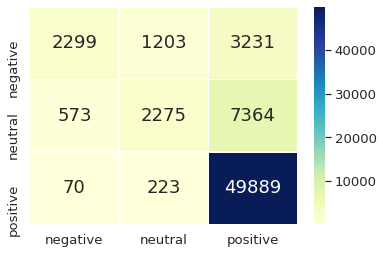

In [ ]:
  cm = confusion_matrix(y_true, y_pred) 
  labels = ['negative', 'neutral', 'positive']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='YlGnBu', linewidth=0.5, fmt="")
  plt.show()

We need to obtain the labels of the x-axis and y-axis

In [ ]:
conf=confusion_matrix(y_true,y_pred)
plot_confusion_matrix(conf)

Obtain statistics about true positive rate and false positive rates

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.34      0.48      6733
           0       0.61      0.22      0.33     10212
           1       0.82      0.99      0.90     50182

    accuracy                           0.81     67127
   macro avg       0.74      0.52      0.57     67127
weighted avg       0.79      0.81      0.77     67127



In [ ]:
lb = preprocessing.LabelBinarizer()
lb_trained = lb.fit(y_test)
y_test_lb = lb_trained.transform(y_test)
y_test_lb

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(labels):
  fpr[i], tpr[i], _ = roc_curve(y_train_lb[:, i], y_pred_proba[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

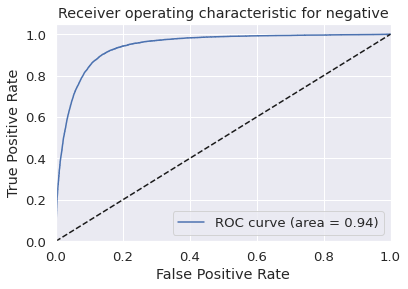

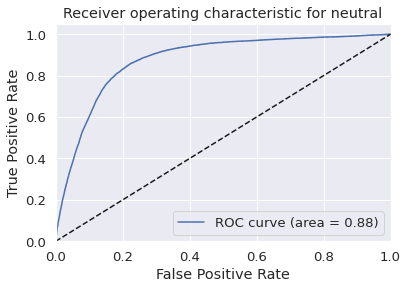

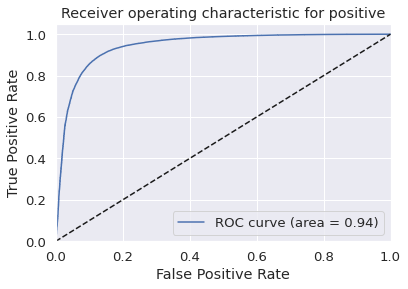

In [ ]:
for i, label in enumerate(labels):
  plt.figure()
  plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for '+label)
  plt.legend(loc="lower right")
  plt.show()

# **Second method : Bert for sentiment analysis**

BERT (Bidirectional Encoder Representations from Transformers) is a bidirectional transformer architecture. A transformer is an attention mechanism that learns contextual relations between words (or sub-words) in a text. Bert is trained as a Masked-Language model. In other words, if you mask a word in a sentence, Bert should be able to predict it seeing the context (left and right context because it is bidirectional). \
In this part we want to use Bert to do classification because we want to do sentiment analysis. \
First we will prepare the data, Then we will tokenize the comments. After that we will train our model on the train dataset, using validation dataset to keep the better weights, and finally we will analyze the scores.

### **Preparation of the environment and datasets**

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.1MB 10.4MB/s 
     |████████████████████████████████| 901kB 51.7MB/s 
     |████████████████████████████████| 3.3MB 54.6MB/s 


We install the libraries we will need :

In [ ]:
import torch 
import numpy as np 
import os 
import random 
import pandas as pd 
import math
from tqdm.notebook import tqdm 
from sklearn.model_selection import train_test_split 
from transformers import BertTokenizer 
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset 
from transformers import BertForSequenceClassification 
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler 
from sklearn.metrics import f1_score 
import matplotlib.pyplot as plt


We import our drive to get our datasets :

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


We load the datasets :

In [ ]:
%cd "/content/drive/MyDrive/ML for NLP/projet/"
X_train = pd.read_csv("X_train.csv")
X_train = X_train.drop(columns = ['lemmas','mean_word2vec_2'])
X_test = pd.read_csv("X_test.csv")
X_test = X_test.drop(columns = ['lemmas','mean_word2vec_2'])
X_val = pd.read_csv("X_val.csv")
X_val = X_val.drop(columns = ['lemmas','mean_word2vec_2'])
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_val = pd.read_csv("y_val.csv")

/content/drive/.shortcut-targets-by-id/1W4QW2QIjyvZ7QcdssmqEu9-ZrKPWRkWD/ML for NLP/projet


We need to drop part of the dataset because it is too big to train Bert, it would take too much time. We only drop raws where sentiment = 1 to reduce the imbalance.

In [ ]:
# PREPARATION OF THE DATASET

# 1. We drop part of the dataset where sentiment = 1, first to train faster, and to have a datset a little less unbalanced
frac = .8
X_train=X_train.drop(X_train.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
X_test=X_test.drop(X_test.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
X_val=X_val.drop(X_val.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
y_train=y_train.drop(y_train.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)
y_test=y_test.drop(y_test.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)
y_val=y_val.drop(y_val.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)

# 2. We reindex the dataframes because we dropped some rows
X_train = X_train.reset_index()
y_train = y_train.reset_index()
X_test = X_test.reset_index()
y_test = y_test.reset_index()
X_val = X_val.reset_index()
y_val = y_val.reset_index()

In [ ]:
# To train bert classification, we need label values that are 0, 1, 2 instead of -1, 0, 1.
y_train["sentiment"] = y_train['sentiment'].apply(lambda x : x + 1)
y_test["sentiment"] = y_test['sentiment'].apply(lambda x : x + 1)
y_val["sentiment"] = y_val['sentiment'].apply(lambda x : x + 1)

We now want to see the repartition of negative, neutral and positive reviews in the three datasets :

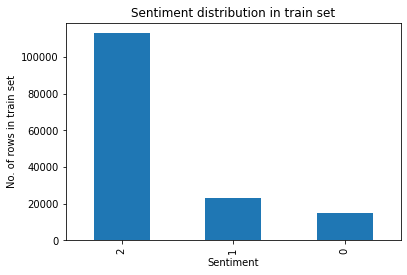

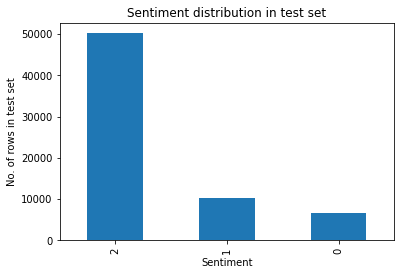

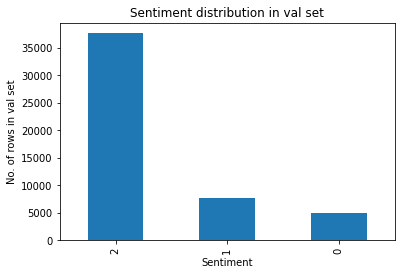

In [ ]:
plt.figure()
pd.value_counts(y_train["sentiment"]).plot.bar(title="Sentiment distribution in train set")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in train set")
plt.show()
plt.figure()
pd.value_counts(y_test["sentiment"]).plot.bar(title="Sentiment distribution in test set")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in test set")
plt.show()
plt.figure()
pd.value_counts(y_val["sentiment"]).plot.bar(title="Sentiment distribution in val set")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in val set")
plt.show()

The datasets are still unbalanced, but less than before.


---


 Now let's change the rows with review = nan into review = "" to avoid errors.

In [ ]:
for i in range(len(X_train)) :
    try :
        if math.isnan(X_train["review"][i]) :
            X_train["review"][i] = ""
    except :
        a=1


for i in range(len(X_test)) :
    try :
        if math.isnan(X_test["review"][i]) :
            X_test["review"][i] = ""
    except :
        a=1

for i in range(len(X_val)) :
    try :
        if math.isnan(X_val["review"][i]) :
            X_val["review"][i] = ""
    except :
        a=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Our datasets are ready. Let's do the preprocessing for Bert training.

### **Bert pre-processing**

To be able to train Bert, we need to tokenize the reviews. The function batch_encode_plus returns


*   **input_ids** : They are token indices, numerical 
representations of tokens building the sequences that will be used as input by our classification model.
*   **token_type_ids**  

*   **attention_mask** :  indicates to the model which tokens should be attended to, and which should not.





 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
#ENCODING DATA
encoded_data_train = tokenizer.batch_encode_plus(X_train.review.values.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=64,
                                                return_tensors='pt',
                                                )
encoded_data_val = tokenizer.batch_encode_plus(X_val.review.values.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=64,
                                                 return_tensors='pt'
                                                )
encoded_data_test = tokenizer.batch_encode_plus(X_test.review.values.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=64,
                                                 return_tensors='pt'
                                                )
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.sentiment.values)
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val.sentiment.values)
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(y_test.sentiment.values)
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Now we can load the Bert pre-trained model for sequence classification :
We choose the AdamW optimizer because it seems to get good results in Bert model.

In [ ]:
#SETTING MODEL
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3, output_attentions=False, output_hidden_states=False )
#CREATING DATA LOADERS
dataloader_train = DataLoader(dataset_train,shuffle = False, batch_size= 64)
                             
dataloader_val = DataLoader(dataset_val, shuffle = False , batch_size= 64) 
      
#SETTING OPTIMIZERS
optimizer = AdamW(model.parameters(),lr=1e-4,eps=1e-6)
epochs = 5
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Now, we want to indicate that we will use a GPU to train Bert, to be able to convert the model so that it can works on GPU and not CPU only.

In [ ]:
import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

We create functions to calculate f1 scores, accuracy per class and another one to apply our model on our dataset. This will help us first during the training and then to evaluate our model performance.

In [ ]:
#FUNCTION TO CALCULATE F1 SCORE
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')
#FUNCTION FOR CALCULATING ACCURACY PER CLASS
def accuracy_per_class(preds, labels):
    #label_dict_inverse = {v:k for k,v in label_dict.items()}
    
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        #print(label_dict_inverse[label])
        print("accuracy ", len(y_preds[y_preds==label])/len(y_true))
#FUNCTION FOR MODEL EVALUATION
def evaluate(dataloader_val):
    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

### **Training model**

Now we can train our model during 5 epochs.

In [ ]:

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc ='Epoch {:1d}'.format(epoch),
                        leave=False,
                       disable=False
                       )
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)

        
        inputs = { 'input_ids' : batch[0],
                 'attention_mask' : batch[1],
                 'labels' : batch[2]
                 }

        outputs = model(input_ids = batch[0], attention_mask = batch[1], labels = batch[2])
        
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
    
    # We print the losses and save the weights at each epoch
    torch.save(model.state_dict(), f'BERT_ft_epoch{epoch}.model')
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 score (weighted): {val_f1}')  


Epoch 1
Training loss: 0.7591445885286247
Validation loss: 0.7347005541321586
F1 score (weighted): 0.6395423531728757



Epoch 2
Training loss: 0.7497428584810739
Validation loss: 0.7441492743004383
F1 score (weighted): 0.6395423531728757



Epoch 3
Training loss: 0.7382387311364674
Validation loss: 0.73711432219309
F1 score (weighted): 0.6395423531728757



Epoch 4
Training loss: 0.7360546330762384
Validation loss: 0.7359411749785253
F1 score (weighted): 0.6395423531728757



Epoch 5
Training loss: 0.7354577820793848
Validation loss: 0.7352299856488254
F1 score (weighted): 0.6395423531728757



We can see here that the f1-score of the validation set is the same during all the epochs. So it seems that we have a problem. Let's see the scores to understand what went wrong.

### **Performance and scores**

Here we just load the weights that we had at the end of the training step from our google drive.

In [ ]:
%cd "/content/drive/MyDrive/ML for NLP/projet/"
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3, output_attentions=False, output_hidden_states=False )
model.load_state_dict(torch.load("BERT_ft_epoch5.model",map_location=torch.device('cpu')))
dataloader_train = DataLoader(dataset_train,shuffle = False, batch_size= 64)   #sampler = RandomSampler(dataset_train)
                             
dataloader_val = DataLoader(dataset_val, shuffle = False , batch_size= 64)  #sampler = RandomSampler(dataset_val)

dataloader_test = DataLoader(dataset_test, shuffle = False , batch_size= 64)  #sampler = RandomSampler(dataset_val)
#SETTING OPTIMIZERS
optimizer = AdamW(model.parameters(),lr=1e-3,eps=1e-6)
epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)

/content/drive/.shortcut-targets-by-id/1W4QW2QIjyvZ7QcdssmqEu9-ZrKPWRkWD/ML for NLP/projet


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

**Scores on validation set**

Here, true_vals are the sentiment labels of the dataset and predictions is an array with, for each observation, a score for each class (it could be compared to a probability that a comment belongs to each class, but the scores can be negative). The highest score designates the class associated with the comment.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
val_loss, predictions, true_vals = evaluate(dataloader_val)

In [ ]:
val_f1 = f1_score_func(predictions, true_vals)
val_f1

0.6395423531728757

In [ ]:
accuracy_per_class(predictions, true_vals)

accuracy  0.0
accuracy  0.0
accuracy  1.0


Here we can see that the model is just like the naive model : it gives the positive sentiment to all the comments. This is completely useless. It can be explained by the fact that the dataset is very unbalanced.


---

To avoid this problem, we decided to drop more rows and re-train the model (we should have done smote but we did not have the time to retrain the model with that much observations).
The following part is just the same as we did before but with a smaller dataset.

### **2nd try on a more balanced and smaller dataset**

In [ ]:
%cd "/content/drive/MyDrive/ML for NLP/projet/"
X_train2 = pd.read_csv("X_train.csv")
X_train2 = X_train2.drop(columns = ['lemmas','mean_word2vec_2'])
X_test2 = pd.read_csv("X_test.csv")
X_test2 = X_test2.drop(columns = ['lemmas','mean_word2vec_2'])
X_val2 = pd.read_csv("X_val.csv")
X_val2 = X_val2.drop(columns = ['lemmas','mean_word2vec_2'])
y_train2 = pd.read_csv("y_train.csv")
y_test2 = pd.read_csv("y_test.csv")
y_val2 = pd.read_csv("y_val.csv")

/content/drive/.shortcut-targets-by-id/1W4QW2QIjyvZ7QcdssmqEu9-ZrKPWRkWD/ML for NLP/projet


In [ ]:
# PREPARATION OF THE DATASET

# 1. We drop part of the dataset where sentiment = 1, first to train faster, and to have a datset a little less unbalanced
frac = .95
X_train2=X_train2.drop(X_train2.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
X_test2=X_test2.drop(X_test2.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
X_val2=X_val2.drop(X_val2.query('rating in [4,5]').sample(frac=frac, random_state = 42).index)
y_train2=y_train2.drop(y_train2.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)
y_test2=y_test2.drop(y_test2.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)
y_val2=y_val2.drop(y_val2.query('sentiment ==1 ').sample(frac=frac, random_state = 42).index)

# 2. We reindex the dataframes because we dropped some rows
X_train2 = X_train2.reset_index()
y_train2 = y_train2.reset_index()
X_test2 = X_test2.reset_index()
y_test2 = y_test2.reset_index()
X_val2 = X_val2.reset_index()
y_val2 = y_val2.reset_index()

In [ ]:
# To train bert classification, we need label values that are 0, 1, 2 instead of -1, 0, 1.
y_train2["sentiment"] = y_train2['sentiment'].apply(lambda x : x + 1)
y_test2["sentiment"] = y_test2['sentiment'].apply(lambda x : x + 1)
y_val2["sentiment"] = y_val2['sentiment'].apply(lambda x : x + 1)

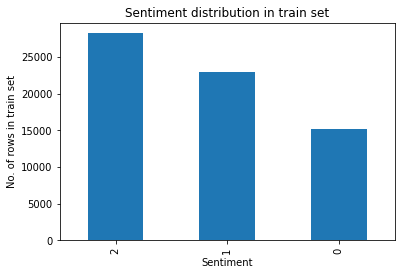

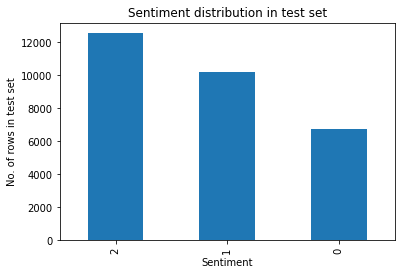

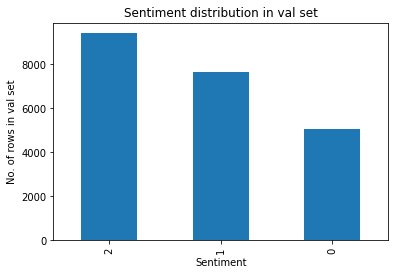

In [ ]:
plt.figure()
pd.value_counts(y_train2["sentiment"]).plot.bar(title="Sentiment distribution in train set")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in train set")
plt.show()
plt.figure()
pd.value_counts(y_test2["sentiment"]).plot.bar(title="Sentiment distribution in test set")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in test set")
plt.show()
plt.figure()
pd.value_counts(y_val2["sentiment"]).plot.bar(title="Sentiment distribution in val set")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in val set")
plt.show()

In [ ]:
for i in range(len(X_train2)) :
    try :
        if math.isnan(X_train2["review"][i]) :
            X_train2["review"][i] = ""
    except :
        a=1


for i in range(len(X_test2)) :
    try :
        if math.isnan(X_test2["review"][i]) :
            X_test2["review"][i] = ""
    except :
        a=1

for i in range(len(X_val2)) :
    try :
        if math.isnan(X_val2["review"][i]) :
            X_val2["review"][i] = ""
    except :
        a=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
#ENCODING DATA
encoded_data_train = tokenizer.batch_encode_plus(X_train2.review.values.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=64,
                                                return_tensors='pt',
                                                )
encoded_data_val = tokenizer.batch_encode_plus(X_val2.review.values.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=64,
                                                 return_tensors='pt'
                                                )
encoded_data_test = tokenizer.batch_encode_plus(X_test2.review.values.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=64,
                                                 return_tensors='pt'
                                                )
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train2.sentiment.values)
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val2.sentiment.values)
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(y_test2.sentiment.values)
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
#SETTING MODEL
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3, output_attentions=False, output_hidden_states=False )
#CREATING DATA LOADERS
dataloader_train = DataLoader(dataset_train,shuffle = False, batch_size= 64)   #sampler = RandomSampler(dataset_train)
                             
dataloader_val = DataLoader(dataset_val, shuffle = False , batch_size= 64)  #sampler = RandomSampler(dataset_val)
      
#SETTING OPTIMIZERS
optimizer = AdamW(model.parameters(),lr=1e-4,eps=1e-6)
epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
dataloader_test = DataLoader(dataset_test, shuffle = False , batch_size= 64)  #sampler = RandomSampler(dataset_val)

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc ='Epoch {:1d}'.format(epoch),
                        leave=False,
                       disable=False
                       )
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)

        
        inputs = { 'input_ids' : batch[0],
                 'attention_mask' : batch[1],
                 'labels' : batch[2]
                 }

        outputs = model(input_ids = batch[0], attention_mask = batch[1], labels = batch[2])
        
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
    
    # We print the losses and save the weights at each epoch
    #torch.save(model.state_dict(), f'BERT_ft_epoch{epoch}.model')
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 score (weighted): {val_f1}')  


Epoch 1
Training loss: 0.6571385984882899
Validation loss: 0.56479708101019
F1 score (weighted): 0.7574190962757332



Epoch 2
Training loss: 0.49725782599662977
Validation loss: 0.5385971030575691
F1 score (weighted): 0.7774815420781523



Epoch 3
Training loss: 0.4158532303347537
Validation loss: 0.5502672626965308
F1 score (weighted): 0.777736377575841



The results seem better ! We can already see that it looks like we are overfitting the train set. We will se it in more details in the following section.

### **Evaluation of the model**

**Quantitatively**

We use the function of the TD to sum up the performance of the second Bert model.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import seaborn as sn
 
def show_eval(y_true, y_pred):
 ''' 
 Show eval metrics. Takes binarized y true and pred along with trained binarizer for label names
 '''
 print( classification_report(y_true, y_pred) )
 cm = confusion_matrix(y_true, y_pred) 
 labels = ['negative', 'neutral', 'positive']
 df_cm = pd.DataFrame(cm, index=labels, columns=labels)
 # config plot sizes
 sn.set(font_scale=1.2)
 sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='YlGnBu', linewidth=0.5, fmt="")
 plt.show()
 
 """
 fpr = dict()
 tpr = dict()
 roc_auc = dict()
 for i, label in enumerate(labels):
  fpr[i], tpr[i], _ = roc_curve(y_true[: i], y_pred[: i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print(label, roc_auc[i])
 
 for i, label in enumerate(labels):
  plt.figure()
  plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for '+label)
  plt.legend(loc="lower right")
  plt.show()

  """

**On the train set**

In [ ]:
train_loss, train_predictions, train_true_vals = evaluate(dataloader_train)

In [ ]:
y_pred_train =  np.argmax(train_predictions,axis=1).flatten()

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     15154
           1       0.79      0.83      0.81     22981
           2       0.94      0.93      0.94     28230

    accuracy                           0.86     66365
   macro avg       0.85      0.84      0.85     66365
weighted avg       0.86      0.86      0.86     66365



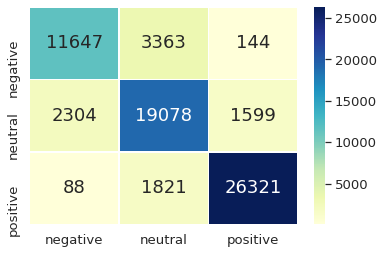

In [ ]:
show_eval(train_true_vals, y_pred_train)

In [ ]:
accuracy_per_class(train_predictions, train_true_vals)

accuracy  0.7685759535436189
accuracy  0.8301640485618554
accuracy  0.9323769040028339


**On the test set**

In [ ]:
test_loss, test_predictions, test_true_vals = evaluate(dataloader_test)

In [ ]:
y_pred_test =  np.argmax(test_predictions,axis=1).flatten()

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      6735
           1       0.69      0.74      0.71     10214
           2       0.88      0.88      0.88     12547

    accuracy                           0.78     29496
   macro avg       0.77      0.76      0.76     29496
weighted avg       0.78      0.78      0.78     29496



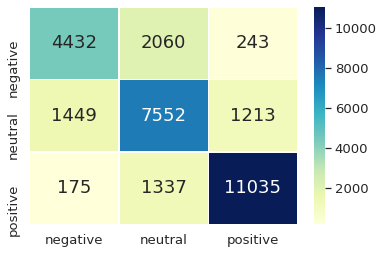

In [ ]:
show_eval(test_true_vals, y_pred_test)

In [ ]:
accuracy_per_class(test_predictions, test_true_vals)

accuracy  0.6580549368968077
accuracy  0.7393773252398669
accuracy  0.8794931059217342


In [ ]:
tpr[2]

array([0.00000000e+00, 7.97003268e-05, 1.52227624e-02, ...,
       9.99920300e-01, 1.00000000e+00, 1.00000000e+00])

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb_test = lb.fit(test_true_vals)
y_test_lb = lb_test.transform(test_true_vals)

 
fpr = dict()
tpr = dict()
roc_auc = dict()
labels = ['negative', 'neutral', 'positive']
for i, label in enumerate(labels):
 fpr[i], tpr[i], _ = roc_curve(y_test_lb[:, i], test_predictions[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])


 


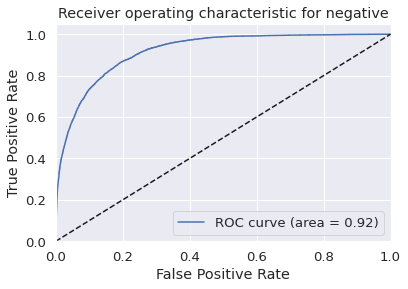

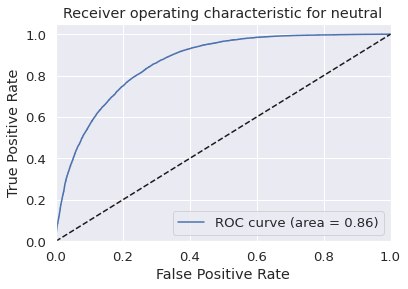

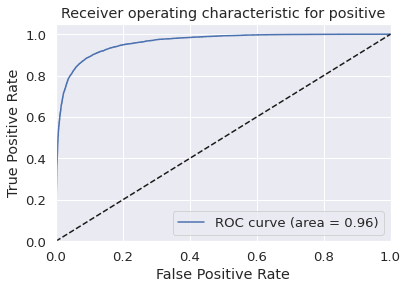

In [ ]:
for i, label in enumerate(labels):
 plt.figure()
 plt.plot(fpr[i], tpr[i],label='ROC curve (area = %0.2f)' % roc_auc[i])
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver operating characteristic for '+label)
 plt.legend(loc="lower right")
 plt.show()

If we compare the performances on the train and the test sets, we can see that we have a little bit of overfitting. If we concentrate on the test set we can see that the accuracy is better for the positive comments. This makes sense because the dataset is imbalanced. We also see in the confusion matrix that the cross around "neutral" has more misclassified values. This can be explained by the fact that the comments with The rating 3 are not necesserly neutral, they can be positive and negative too, so the model can do some mistakes because the labelling is not very good.

**Qualitatively**

We want to see examples of comments that are miclassified to see if we can find a pattern.



---



First we have a look on the negative comments that are predicted as positive :

In [ ]:
for i in range(len(y_pred_test)) :
    if y_pred_test[i] == 2 and test_true_vals[i] == 0 :
        print(i, X_train2["review"][i])

6 Very good seasoning! We used this with chicken, and I forgot to add the bullion, but it still turned out very good! I definitely recommend, and I have some left over for next time!
14 I made this last night because I was looking for a quick snack.  I have to say that it was not my favorite.  The combo of the banana & grape juice was weird.  Next time I will just omit the banana.  Sorry!
123 I'm not sure if I did something wrong. These were a little mushy inside. However, the wonderful taste did not suffer. I agree with previous reviewers that these were so flavorful. I will not add water next time I make these. For such a healthy recipe, it did not take up too much time in the morning.
153 Okay, the crust was really good on this!  And I can't give it too bad a review because I added fresh peaches and that may be the reason that the filling did not set up.  I will use the crust recipe again but not the filling...
218 This turned out to be the sweetest sambal I have ever made-sickly so

We can see that there are different reasons that presumed negative comments (those who had a rating of 1 or 2) are qualified as positive :


*   Comments that are actually positive but the person gave a bad grade (maybe a missclick ?) :




In [ ]:
#Examples :
print(X_train2["review"][6],"\n",X_train2["review"][319])

Very good seasoning! We used this with chicken, and I forgot to add the bullion, but it still turned out very good! I definitely recommend, and I have some left over for next time! 
 Great cookies.  Love all the flavors in them.  Easy to work with and quick to do.




*   Comments that find a flaw in the recipe but despite this flaw they say the recipe is good (this confuses the model because positive vocabulary is used). This shows that our hypothesis saying that comments are only positive or only negative was too strong.




In [ ]:
#Examples :
print(X_train2["review"][123],"\n",X_train2["review"][1322])

I'm not sure if I did something wrong. These were a little mushy inside. However, the wonderful taste did not suffer. I agree with previous reviewers that these were so flavorful. I will not add water next time I make these. For such a healthy recipe, it did not take up too much time in the morning. 
 This was tasty, but took a lot of effort.  I used rotisserie chicken to speed things up but this was just too much for a weeknight meal in my book!  I added some Frank's Red Hot sauce and liquid smoke and forgot to pick up chocolate so I used a teaspoon of cocoa powder for depth.  Cornbread twists are no longer made, so I just made cornbread and dumped it on top - still tasty!  Will look forward to leftovers.




*   Some are negative but the algorithm made a mistake



In [ ]:
#Examples :
print(X_train2["review"][218],"\n",X_train2["review"][3902])

This turned out to be the sweetest sambal I have ever made-sickly so. Wasted a pound of peppers. Really bummed. 1 cup of sugar? Seriously, way off, but I don't know how much less would make this any good. 
 I followed the directions exactly, and I'm sorry to say that this dessert tasted terrible! It took much longer to cook, therefore it was dry. Plus there was no taste to the brownies, very bland. I couldn't even get my kids to eat it.




---

Now let's see the positive comments that are classified as negative.

In [ ]:
for i in range(len(y_pred_test)) :
    if y_pred_test[i] == 0 and test_true_vals[i] == 2 :
        print(i, X_train2["review"][i])

811 It was all right.  It had a tad too much spinach IMO and I added a little more alfredo sauce...if I do make it again, I'll definitely cut the spinach in half.  Other than that though, I'll leave it alone!  My daughter loved it as is though! =o)
842 I made this as a breakfast scramble and added chopped fake sausage links!  The lime gives it a nice tang!
895 Easy to make, but my husband and I didn't really care for this. If I do try it again, I would use garlic powder instead of garlic salt for a little more garlic flavor since you add salt to taste anyway. Thanks.
1061 YUM! This was very good!  Normally when I try something new my son says "it's ok" when I made this dish he said "Mmmm this is good. you should make this again!"  I will be making it again soon!
1100 I chose this recipe because I have the fondest memories of my grandmother's molasses cookies.  We called them "Grandma Cookies."  She always made them before our visits.  As a matter of fact the tray the cookies are on in 

We have the same patterns here :


*   Actually negative comments but with a rating that did not match (missclick ?)




In [ ]:
#Examples :
print(X_train2["review"][3629],"\n",X_train2["review"][11263])

I figured with so many good reviews that this would be amazing.  I found it to be just okay and will not make again.  We did not like the texture or flavor.  I subsequently tried a couple other Zaar banana bread recipes and was much happier with them. 
 not our taste...too much ginger for us




*   Comments that have positive and negative aspects



In [ ]:
#Examples :
print(X_train2["review"][9915])

Very simple recipe.  Taste was good.  A little dry.  Will try again.




*   Comment that are really positive but the model made a mistake


In [ ]:
#Examples :
print(X_train2["review"][10347],"\n",X_train2["review"][20167])

Fantastic recipe!  My family loved it! 
 Wow I can't believe I haven't rated this recipe.  I have made this twice and my family loves it.  It is so easy to make and taste like Chinese takeout :)
Thank you for a great recipe!


### **III. Answer to our problem : Do vegetarian meals taste bad ?**

We get back to the notation -1 for negative, 0 for neutral and 1 for positive :

In [ ]:
y_pred_test = y_pred_test - 1
test_true_vals = test_true_vals - 1

In [ ]:
is_vege = []
is_not_vege = []
n = len(y_pred_test)
for i in range(n) :
    if X_train2["vegetarian"][i] :
        is_vege.append(i)
    else :
        is_not_vege.append(i)

nb_vege = len(is_vege)
nb_no_vege = n - nb_vege
mean_sentiment_vege = 0
mean_sentiment_no_vege = 0
for i in range(n) :
    if i in is_vege :
        mean_sentiment_vege += y_pred_test[i]
    else :
        mean_sentiment_no_vege += y_pred_test[i]
mean_sentiment_no_vege = mean_sentiment_no_vege / nb_no_vege
mean_sentiment_vege = mean_sentiment_vege / nb_vege
print("The average sentiment on vegetarian recipes is ",mean_sentiment_vege)
print("The average sentiment on non vegetarian recipes is ", mean_sentiment_no_vege)

The average sentiment on vegetarian recipes is  0.2024989228780698
The average sentiment on non vegetarian recipes is  0.221091172447091


Now let's see the repartition between negative, neutral and positive :

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


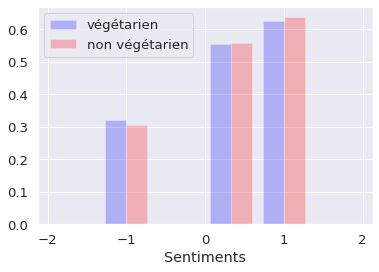

In [ ]:
y_vege = [y_pred_test[i] for i in is_vege]
y_no_vege = [y_pred_test[i] for i in is_not_vege]
##Histograms
plt.hist([y_vege,y_no_vege], density=True, range = (-2, 2), bins = 6, color = ['blue','red'],alpha=0.25,label=["végétarien","non végétarien"])
#plt.hist(nonvegetaBoxplot.rating,  density=True, range = (0, 6), bins = 10, color = 'red', alpha=0.25,label="non végétarien")
plt.xlabel('Sentiments')
plt.legend()